Sentimental Analysis on Tweets using TextBlob


*   The program will ask the user for a keyword to search for 100 latest
*   Using Twitter API the program will performs sentiment analysis on each    tweet and calculates its polarity scores
*   For classification pupose then calculates the average polarity score of all tweets and determines the sentiment of the keyword based on the polarity score
* At the end the program will plot a histogram of the sentiment scores




In [ ]:
#***********************************************************************************************************************************************************
# Programmer: Sreerag M. Pillai
#
# Pseudocode:
# Import necessary libraries - tweepy, textblob, pandas, and matplotlib.
#
# Set up the Twitter API keys and tokens.
#
# Ask the user to enter a keyword to search for.
#
# Use the Tweepy library to establish twitter API connection to search for the last 1000 tweets that contain the user inputted keyword.
#
# Perform sentiment analysis on each tweet using TextBlob library.
#
# Calculate the average polarity score of all tweets.
#
# Determine the sentiment of the keyword based on the polarity score - Positive / Negative / Neutral.
#
# Print the sentiment and average polarity scores.
#
# Use pandas to create a DataFrame of the sentiment scores for plotting.
#
# Use matplotlib to plot a histogram of the sentiment scores.
#*****************************************************************************************************************************************************************

In [ ]:
#installing necessary libraries
!pip install pandas
!pip install tweepy
!pip install textblob
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Enter the word to search: 
ABNB

Average polarity of 100 tweets is: 0.03144857954545456 

The sentiment of word "ABNB" is Positive




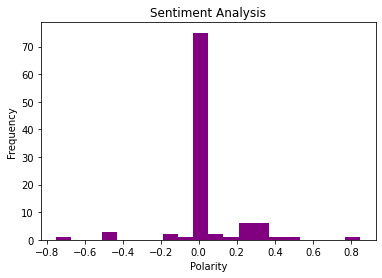

In [19]:
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Set up API keys and tokens
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

# Authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Set up API client
api = tweepy.API(auth)

# Asking for user input for search
print(f'Enter the word to search: ')
user_input = str(input())

print()

# Search for last 1000 tweets with a given keyword
public_tweets = api.search(user_input, count=1000)

# Perform sentiment analysis on each tweet
sentiments_list = []
for tweet in public_tweets:
    analysis = TextBlob(tweet.text)
    sentiment = analysis.sentiment.polarity
    sentiments_list.append(sentiment)

# Calculate average polarity of all tweets
average_polarity = sum(sentiments_list) / len(sentiments_list)


# determining possitive or negative sentiment
def sentiment(x):
  if x > 0:
    sentiment = "Positive"
  elif x < 0:
    sentiment = "Negative"
  else:
    sentiment = "Neutral"
  return sentiment


print(f"Average polarity of {len(sentiments_list)} tweets is: {average_polarity} \n\nThe sentiment of word \"{user_input}\" is {sentiment(average_polarity)}\n\n")



# Plot sentiment analysis results using matplotlib
df = pd.DataFrame(sentiments_list, columns=['Sentiment'])
plt.hist(df['Sentiment'], bins=20, color='purple')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


